In [ ]:
import os

print(os.getcwd())

c:\Users\70081796\project01_gymdata\eda


## 데이터 불러오기 및 성별 데이터 분리

In [5]:
import pandas as pd

df = pd.read_csv('c:/Users/70081796/project01_gymdata/0. data/gym_members_exercise_tracking.csv')
df.head()

df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

print(len(df_male), len(df_female))


511 462


## 성별 기본 정보 확인
### 남녀 별로 나이, 키, 몸무게 분포 확인

Male      511
Female    462
Name: Gender, dtype: int64


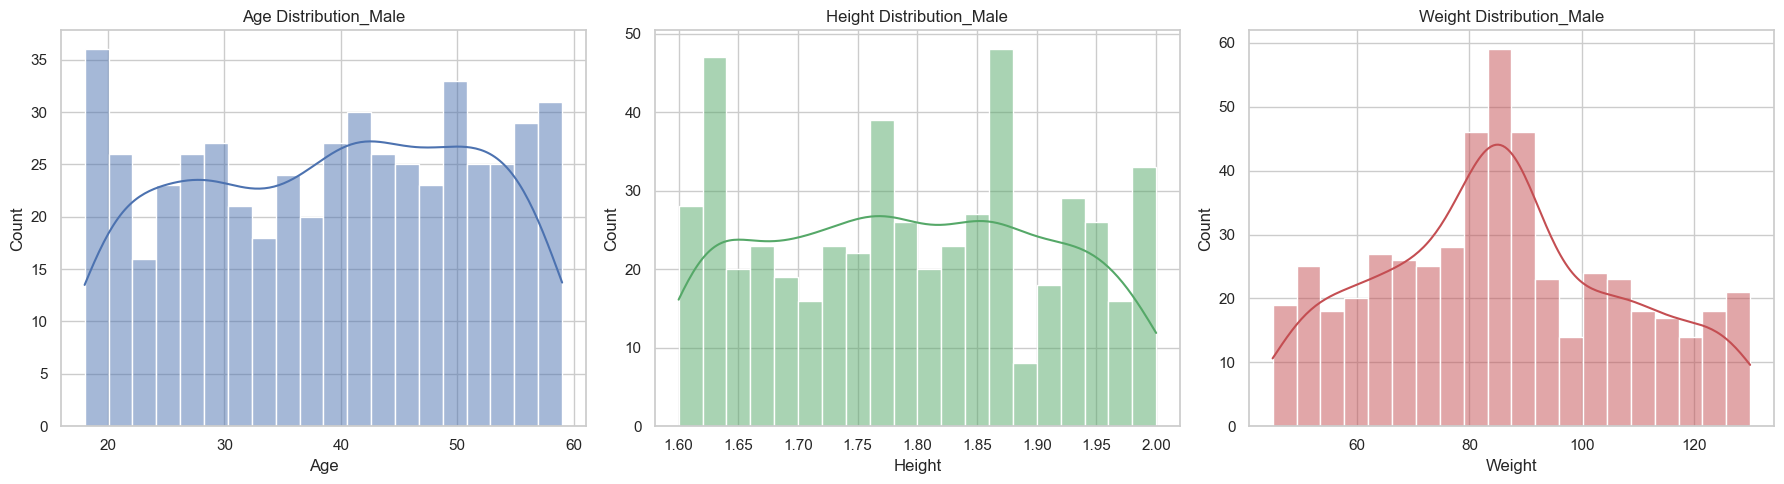

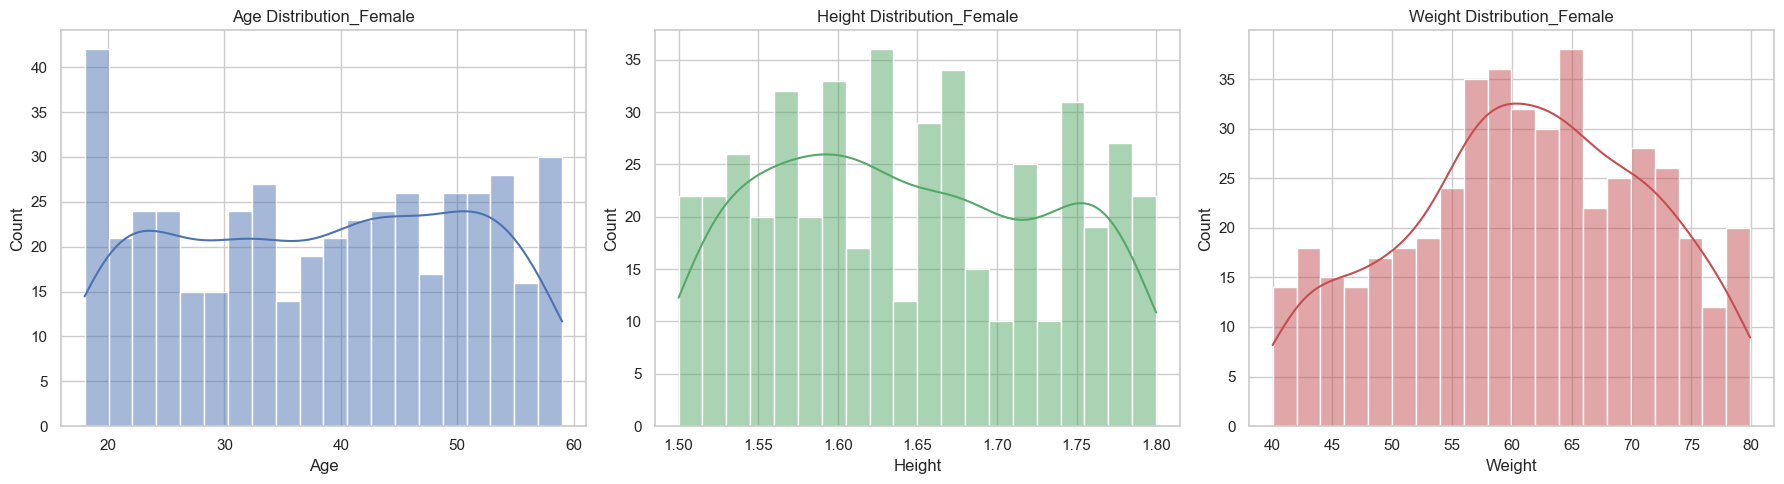

In [ ]:
# Gender 변수 table 확인
print(df['Gender'].value_counts())


import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

## 남성
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age
sns.histplot(df_male['Age'], kde=True, bins=20, color='#4C72B0', ax=axes[0])
axes[0].set_title('Age Distribution_Male')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Height
sns.histplot(df_male['Height (m)'], kde=True, bins=20, color='#55A868', ax=axes[1])
axes[1].set_title('Height Distribution_Male')
axes[1].set_xlabel('Height')

# Weight
sns.histplot(df_male['Weight (kg)'], kde=True, bins=20, color='#C44E52', ax=axes[2])
axes[2].set_title('Weight Distribution_Male')
axes[2].set_xlabel('Weight')

plt.tight_layout()
plt.show()


## 여성
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age
sns.histplot(df_female['Age'], kde=True, bins=20, color='#4C72B0', ax=axes[0])
axes[0].set_title('Age Distribution_Female')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Height
sns.histplot(df_female['Height (m)'], kde=True, bins=20, color='#55A868', ax=axes[1])
axes[1].set_title('Height Distribution_Female')
axes[1].set_xlabel('Height')

# Weight
sns.histplot(df_female['Weight (kg)'], kde=True, bins=20, color='#C44E52', ax=axes[2])
axes[2].set_title('Weight Distribution_Female')
axes[2].set_xlabel('Weight')

plt.tight_layout()
plt.show()

### Insight
- 나이: 남성의 경우 고루고루 분포. 여성의 경우 20세 미만이 상대적으로 많음
- 키: 남녀 모두 특별한 패턴은 없음
- 몸무게: 남성의 경우 약간의 정규분포 느낌. 여성의 경우 분산이 큰 정규분포 느낌

## Workout Type 관련 내용 확인

In [10]:
# Workout_Type, Experience_Level table 확인
print(df['Workout_Type'].value_counts())
print('Insight: 4가지 운동 타입이 골고루 존재함')

print()
print(df['Experience_Level'].astype('category').value_counts()) # int여서 범주형으로 변환한 후 table 확인
print('Insight: 중급과 초급이 비슷하게 대다수를 차지하고, 고급은 상대적으로 적은 편')


# 성별에 따른 Workout_Type table 확인
import pandas as pd

gender_workouttype_crosstable = pd.crosstab(df['Gender'], df['Workout_Type'])
print()
print(gender_workouttype_crosstable)
print('Insight: Cardio(유산소), HIIT(고강도인터벌), Strength(근력)의 경우 성별 상관없을 것 같았는데, Yoga의 경우 Male이 더 많은게 의아함.')

Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: Workout_Type, dtype: int64
Insight: 4가지 운동 타입이 골고루 존재함

2    406
1    376
3    191
Name: Experience_Level, dtype: int64
Insight: 중급과 초급이 비슷하게 대다수를 차지하고, 고급은 상대적으로 적은 편

Workout_Type  Cardio  HIIT  Strength  Yoga
Gender                                    
Female           126   107       123   106
Male             129   114       135   133
Insight: Cardio(유산소), HIIT(고강도인터벌), Strength(근력)의 경우 성별 상관없을 것 같았는데, Yoga의 경우 Male이 더 많은게 의아함.


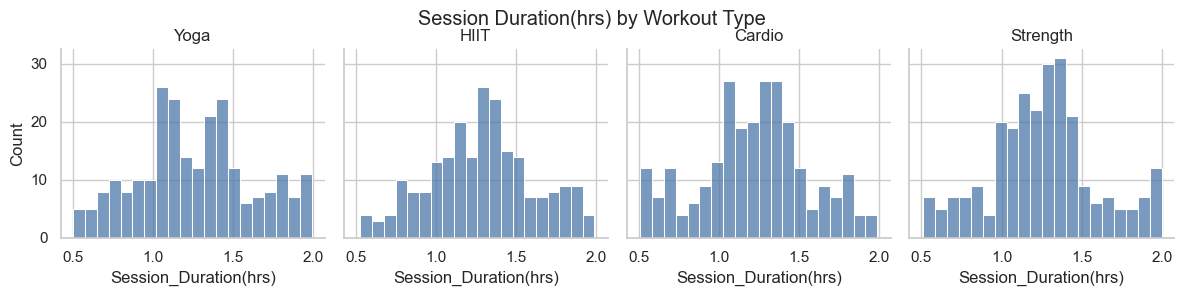

In [ ]:
# Workout_Type 별로 Session_Duration (hours) 분포 확인

order = df['Workout_Type'].unique()

g = sns.FacetGrid(df, col="Workout_Type", col_order=order, col_wrap=4, height=3, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="Session_Duration (hours)", bins=20, kde=False, color="#4C78A8")
g.set_titles("{col_name}")
g.set_axis_labels("Session_Duration(hrs)", "Count")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Session Duration(hrs) by Workout Type")
plt.show()

### Insight
- 4가지 운동 모두 1시간~1.5시간 세션이 제일 많음.

## 나이를 10대 단위로 나누어서 확인

In [13]:
## Age 변수를 10단위로 리코딩한 변수 생성해서 1) 나이대 별 키, 몸무게 분포 확인 2) 나이대 별 Workout_Type table 확인

import pandas as pd
import numpy as np

print(f"Age 변수 최소값은 {df['Age'].min()}, 최대값은 {df['Age'].max()}")

df['Age_decade'] = (df['Age'] // 10 * 10).astype('Int64') # //: 나눈 몫
print()
print(df['Age_decade'].astype(str).value_counts())
print('Insight:  나이는 20대 ~ 50대는 200명 이상으로 비슷하고, 10대는 53명 뿐.')

# 2) 나이대 별 Workout_Type table 확인
age_workouttype_crosstable = pd.crosstab(df['Age_decade'], df['Workout_Type'], margins=True, margins_name='Total')
print()
print(age_workouttype_crosstable)
print("""Insight:
      - 10대가 가장 많이 하는 운동은 유산소(Cardio), 가장 적게 하는 운동은 고강도인터벌(HIIT)
      - 20대 ~ 50대에서는 크게 쏠리는 것 없이 4가지 운동을 골고루 함""")

Age 변수 최소값은 18, 최대값은 59

40    245
50    243
20    223
30    209
10     53
Name: Age_decade, dtype: int64
Insight:  나이는 20대 ~ 50대는 200명 이상으로 비슷하고, 10대는 53명 뿐.

Workout_Type  Cardio  HIIT  Strength  Yoga  Total
Age_decade                                       
10                19     9        13    12     53
20                57    51        61    54    223
30                65    47        56    41    209
40                57    57        62    69    245
50                57    57        66    63    243
Total            255   221       258   239    973
Insight:
      - 10대가 가장 많이 하는 운동은 유산소(Cardio), 가장 적게 하는 운동은 고강도인터벌(HIIT)
      - 20대 ~ 50대에서는 크게 쏠리는 것 없이 4가지 운동을 골고루 함


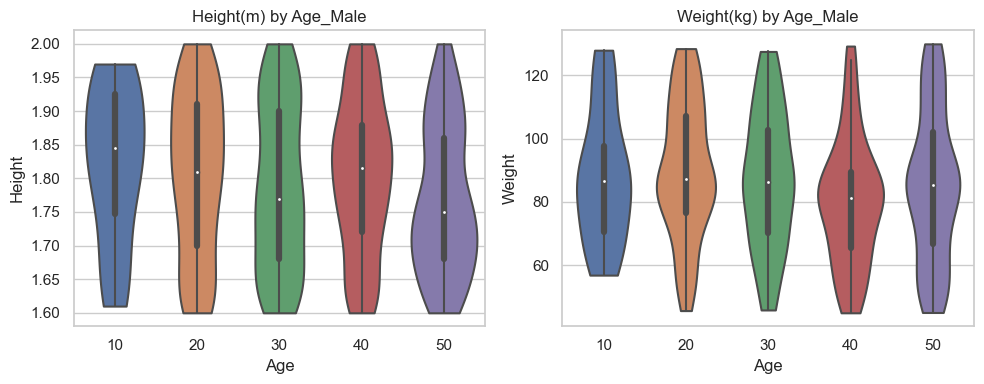

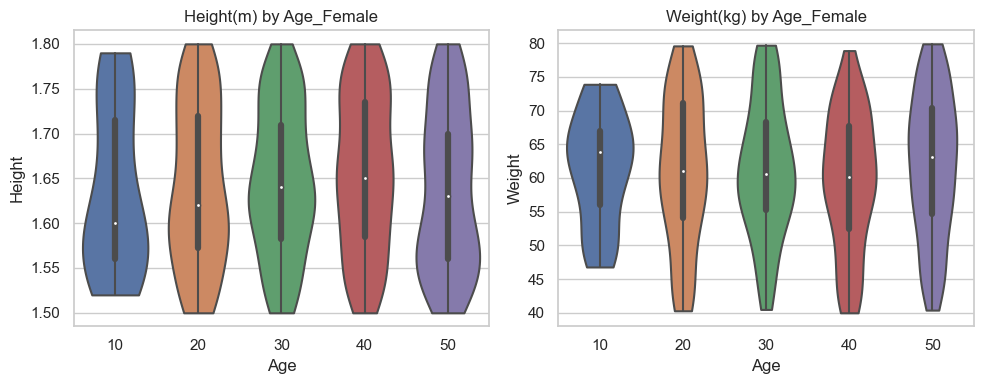

In [ ]:
# 1) 나이대 별 키, 몸무게 분포 확인 (Violin Plot)
# cf. Violin Plot: 여러 카테고리 별 데이터의 분포와 사분위수를 동시에 보여주는 통계 그래프

df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# 남성
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.violinplot(data=df_male, x="Age_decade", y="Height (m)", inner="box", cut=0)
plt.title("Height(m) by Age_Male"); plt.xlabel("Age"); plt.ylabel("Height")

plt.subplot(1, 2, 2)
sns.violinplot(data=df_male, x="Age_decade", y="Weight (kg)", inner="box", cut=0)
plt.title("Weight(kg) by Age_Male"); plt.xlabel("Age"); plt.ylabel("Weight")

plt.tight_layout(); plt.show()


# 여성
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.violinplot(data=df_female, x="Age_decade", y="Height (m)", inner="box", cut=0)
plt.title("Height(m) by Age_Female"); plt.xlabel("Age"); plt.ylabel("Height")

plt.subplot(1, 2, 2)
sns.violinplot(data=df_female, x="Age_decade", y="Weight (kg)", inner="box", cut=0)
plt.title("Weight(kg) by Age_Female"); plt.xlabel("Age"); plt.ylabel("Weight")

plt.tight_layout(); plt.show()

### 칼로리 소모량 관련 내용 확인

In [ ]:
## Workout_Type 별 평균 Calories_Burned
avg_calories_by_workouttype = df.groupby('Workout_Type')['Calories_Burned'].mean().round(2)
print(avg_calories_by_workouttype)
print('''Insight:
      - 예상대로 칼로리 소모량은 고강도인터벌이 제일 높음
      - 유산소보다 요가의 소모량이 더 많은 것은, 요가하는 사람들이 강도 높은 요가를 했기 때문으로 추정됨''')

Workout_Type
Cardio      884.51
HIIT        925.81
Strength    910.70
Yoga        903.19
Name: Calories_Burned, dtype: float64
Insight:
      - 예상대로 칼로리 소모량은 고강도인터벌이 제일 높음
      - 유산소보다 요가의 소모량이 더 많은 것은, 요가하는 사람들이 강도 높은 요가를 했기 때문으로 추정됨


['Max_BPM', 'Avg_BPM', 'Resting_BPM']
Max_BPM            0
Avg_BPM            0
Resting_BPM        0
Calories_Burned    0
Fat_Percentage     0
BMI                0
dtype: int64

피어슨 상관행렬: 
             Calories_Burned  Fat_Percentage       BMI
Max_BPM             0.002090       -0.009056  0.067105
Avg_BPM             0.339659       -0.007302  0.021605
Resting_BPM         0.016518       -0.016834 -0.032543

스피어만 상관행렬:
             Calories_Burned  Fat_Percentage       BMI
Max_BPM            -0.007546       -0.011019  0.075949
Avg_BPM             0.337286        0.001743 -0.002543
Resting_BPM        -0.002602       -0.004913 -0.038421


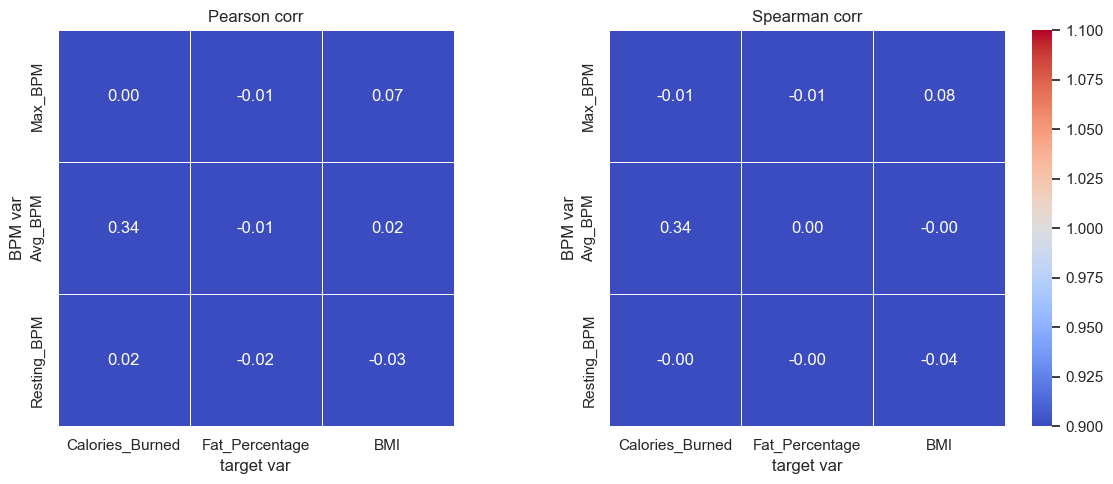

In [24]:
## Correlation Hitmap: 3가지 BPM과 Calories_Burned, Fat_Percentage, BMI
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

bpm_cols = [c for c in df.columns if c.endswith("_BPM")]
print(bpm_cols)
target_cols = ["Calories_Burned", "Fat_Percentage", "BMI"]

# 열별 NA 개수 확인 -> 모든 열에 NA 없음
print(df[bpm_cols + target_cols].isna().sum())

# 사용할 열만 추린 데이터 서브셋 생성
sub = df[bpm_cols + target_cols].copy()

# 상관행렬 계산
pearson_corr = sub.corr(method='pearson').loc[bpm_cols,target_cols]
spearman_corr = sub.corr(method='spearman').loc[bpm_cols,target_cols]
print()
print(f'''피어슨 상관행렬: 
{pearson_corr}''')
print()
print(f'''스피어만 상관행렬:
{spearman_corr}''')

# 히트맵 그리기
sns.set(style='white')

fig, axes = plt.subplots(1,2,figsize=(12,5))

# 1) Pearson
sns.heatmap(
    pearson_corr, ax=axes[0],
    annot=True, fmt=".2f", cmap='coolwarm',
    vmin=1, vmax=1, linewidths=0.5, square=True, cbar=False
)
axes[0].set_title("Pearson corr")
axes[0].set_xlabel('target var')
axes[0].set_ylabel('BPM var')

# 2) Spearman
sns.heatmap(
    spearman_corr, ax=axes[1],
    annot=True, fmt=".2f", cmap='coolwarm',
    vmin=1, vmax=1, linewidths=0.5, square=True, cbar=True
)
axes[1].set_title("Spearman corr")
axes[1].set_xlabel('target var')
axes[1].set_ylabel('BPM var')

plt.tight_layout()
plt.show()

### 해석 가이드
- Pearson: 우리가 흔히 쓰는 상관계수.
- Spearman: 순위 기반이라 비선형이라도 단조 관계가 있을 때 민감. 이상치의 영향을 상대적으로 덜 받음.  
=> 두 히트맵이 유사한 패턴이면 관계가 안정적이고, 차이가 크면 비선형/이상치 또는 스케일 영향 가능성 검토.